# 2022.11.03 Gnuvil

### PCA + Clustering 실습

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('crime.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATEN    50 non-null     object 
 1   STATE     50 non-null     int64  
 2   MURDER    50 non-null     float64
 3   RAPE      50 non-null     float64
 4   ROBBERY   50 non-null     float64
 5   ASSAULT   50 non-null     float64
 6   BURGLARY  50 non-null     float64
 7   LARCENY   50 non-null     float64
 8   AUTO      50 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.6+ KB


In [35]:
df.head()

,STATEN,STATE,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO
0,North Dakota,38,0.9,9.0,13.3,43.8,446.1,1843.0,144.7
1,Wisconsin,55,2.8,12.9,52.2,63.7,846.9,2614.2,220.7
2,Hawaii,15,7.2,25.5,128.0,64.1,1911.5,3920.4,489.4
3,New Hampshire,33,3.2,10.7,23.2,76.0,1041.7,2343.9,293.4
4,Minnesota,27,2.7,19.5,85.9,85.8,1134.7,2559.3,343.1


In [36]:
value = df.iloc[:,2:].values

In [37]:
value

array([[9.0000e-01, 9.0000e+00, 1.3300e+01, 4.3800e+01, 4.4610e+02,
        1.8430e+03, 1.4470e+02],
       [2.8000e+00, 1.2900e+01, 5.2200e+01, 6.3700e+01, 8.4690e+02,
        2.6142e+03, 2.2070e+02],
       [7.2000e+00, 2.5500e+01, 1.2800e+02, 6.4100e+01, 1.9115e+03,
        3.9204e+03, 4.8940e+02],
       [3.2000e+00, 1.0700e+01, 2.3200e+01, 7.6000e+01, 1.0417e+03,
        2.3439e+03, 2.9340e+02],
       [2.7000e+00, 1.9500e+01, 8.5900e+01, 8.5800e+01, 1.1347e+03,
        2.5593e+03, 3.4310e+02],
       [2.3000e+00, 1.0600e+01, 4.1200e+01, 8.9800e+01, 8.1250e+02,
        2.6851e+03, 2.1990e+02],
       [6.0000e+00, 1.3200e+01, 4.2200e+01, 9.0900e+01, 5.9740e+02,
        1.3417e+03, 1.6330e+02],
       [1.4000e+00, 1.5900e+01, 3.0800e+01, 1.0120e+02, 1.3482e+03,
        2.2010e+03, 2.6520e+02],
       [3.9000e+00, 1.8100e+01, 6.4700e+01, 1.1270e+02, 7.6000e+02,
        2.3161e+03, 2.4910e+02],
       [1.0100e+01, 1.9100e+01, 8.1100e+01, 1.2330e+02, 8.7220e+02,
        1.6621e+03, 2.4

In [38]:
# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(value)
pd.DataFrame(scaled, columns=df.columns[2:])

,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO
0,-1.709551,-1.571048,-1.266764,-1.687735,-1.975673,-1.152620,-1.216115
1,-1.213196,-1.204902,-0.821993,-1.487222,-1.039463,-0.079442,-0.819146
2,-0.063742,-0.021969,0.044683,-1.483191,1.447285,1.738226,0.584349
3,-1.108700,-1.411446,-1.153571,-1.363287,-0.584440,-0.455583,-0.439413
4,-1.239320,-0.585270,-0.436677,-1.264542,-0.367205,-0.155839,-0.179817
5,-1.343816,-1.420834,-0.947764,-1.224237,-1.119817,0.019220,-0.823324
6,-0.377230,-1.176737,-0.936330,-1.213154,-1.622259,-1.850214,-1.118962
7,-1.578931,-0.923251,-1.066674,-1.109371,0.131499,-0.654439,-0.586710
8,-0.925833,-0.716707,-0.679071,-0.993496,-1.242449,-0.494269,-0.670805
9,0.693852,-0.622824,-0.491558,-0.886690,-0.980366,-1.404355,-0.690131


In [39]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
value_pca = pca.fit_transform(scaled)
pcaDF = pd.DataFrame(value_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pcaDF

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-4.004323,0.391607,-0.086905,-0.182428,-0.386227,0.408808,-0.097781
1,-2.528372,0.788758,-0.430803,-0.536290,-0.109310,0.058297,-0.256077
2,0.831488,1.842436,-0.789694,-1.192233,1.104392,-0.550454,0.101322
3,-2.490655,0.833406,-0.211617,-0.088963,0.192673,-0.395090,0.095057
4,-1.570123,1.067163,-0.147711,-0.319149,-0.017747,0.229223,0.281090
5,-2.607771,0.833127,-0.520711,-0.303901,-0.294834,-0.095605,-0.446890
6,-3.179679,-0.822518,0.542352,-0.168385,0.043409,0.168118,0.207401
7,-2.085286,0.954561,-0.515975,0.105739,-0.130304,-0.313902,0.922602
8,-2.172543,0.228030,-0.111640,-0.170105,-0.165270,0.426235,-0.186116
9,-1.744441,-1.158273,0.664445,-0.386995,0.564339,-0.023533,0.108847


In [40]:
print('Explained variance ratio :', pca.explained_variance_ratio_)
pca_ratio = pd.DataFrame({'Explained variance':pca.explained_variance_,
             'Explained variance ratio':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(scaled.shape[1])]))
pca_ratio['Cumulative ratio'] = pca_ratio['Explained variance ratio'].cumsum()
pca_ratio

Explained variance ratio : [0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]


,Explained variance,Explained variance ratio,Cumulative ratio
pca1,4.198938,0.587851,0.587851
pca2,1.264002,0.176960,0.764812
pca3,0.740629,0.103688,0.868500
pca4,0.322890,0.045205,0.913704
pca5,0.263239,0.036853,0.950558
pca6,0.226571,0.031720,0.982278
pca7,0.126588,0.017722,1.000000


설명된 분산이 0.7 이상이고 누적 비율이 80% 이상이 되는 pca선택 => pca3까지 적당하다.

In [41]:
pca = PCA(n_components=3) 
values_pca = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data=values_pca, columns = ['PC1', 'PC2', 'PC3'])
print('Explained variance ratio :', pca.explained_variance_ratio_)

Explained variance ratio : [0.58785136 0.17696026 0.10368809]


In [42]:
principalDf

,PC1,PC2,PC3
0,-4.004323,0.391607,-0.086905
1,-2.528372,0.788758,-0.430803
2,0.831488,1.842436,-0.789694
3,-2.490655,0.833406,-0.211617
4,-1.570123,1.067163,-0.147711
5,-2.607771,0.833127,-0.520711
6,-3.179679,-0.822518,0.542352
7,-2.085286,0.954561,-0.515975
8,-2.172543,0.228030,-0.111640
9,-1.744441,-1.158273,0.664445


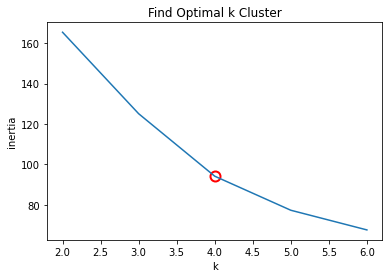

In [43]:
# Kmeans
from sklearn.cluster import KMeans
# 최적의 k 값 찾기
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(values_pca)
    inertia.append(km.inertia_)
plt.plot(4, inertia[2], marker='o', color='red', markersize = 10, markeredgewidth=2, markerfacecolor='None')
plt.plot(range(2,7), inertia)
plt.title('Find Optimal k Cluster')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [44]:
kmeans = KMeans(init='k-means++', n_clusters=4, random_state=100)
kmeans.fit(values_pca)

KMeans(n_clusters=4, random_state=100)

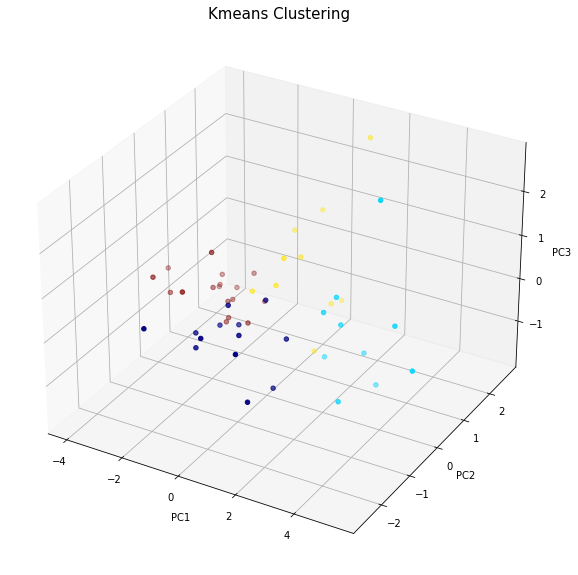

In [53]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf['PC1'], principalDf['PC2'], principalDf['PC3'], c=kmeans.labels_, cmap='jet')
ax.set_title('Kmeans Clustering', size=15)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [56]:
kmeans.labels_

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 3, 3, 3, 2,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0])

In [57]:
copy_df = df.copy()

In [65]:
copy_df['CLUSTER'] = kmeans.labels_

In [66]:
copy_df

,STATEN,STATE,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO,CLUSTER
0,North Dakota,38,0.9,9.0,13.3,43.8,446.1,1843.0,144.7,3
1,Wisconsin,55,2.8,12.9,52.2,63.7,846.9,2614.2,220.7,3
2,Hawaii,15,7.2,25.5,128.0,64.1,1911.5,3920.4,489.4,2
3,New Hampshire,33,3.2,10.7,23.2,76.0,1041.7,2343.9,293.4,3
4,Minnesota,27,2.7,19.5,85.9,85.8,1134.7,2559.3,343.1,3
5,Iowa,19,2.3,10.6,41.2,89.8,812.5,2685.1,219.9,3
6,West Virginia,54,6.0,13.2,42.2,90.9,597.4,1341.7,163.3,3
7,Vermont,50,1.4,15.9,30.8,101.2,1348.2,2201.0,265.2,3
8,Nebraska,31,3.9,18.1,64.7,112.7,760.0,2316.1,249.1,3
9,Kentucky,21,10.1,19.1,81.1,123.3,872.2,1662.1,245.4,3


In [69]:
cluster0 = copy_df[copy_df['CLUSTER'] == 0]
cluster1 = copy_df[copy_df['CLUSTER'] == 1]
cluster2 = copy_df[copy_df['CLUSTER'] == 2]
cluster3 = copy_df[copy_df['CLUSTER'] == 3]

Text(0.5, 1.0, 'AUTO')

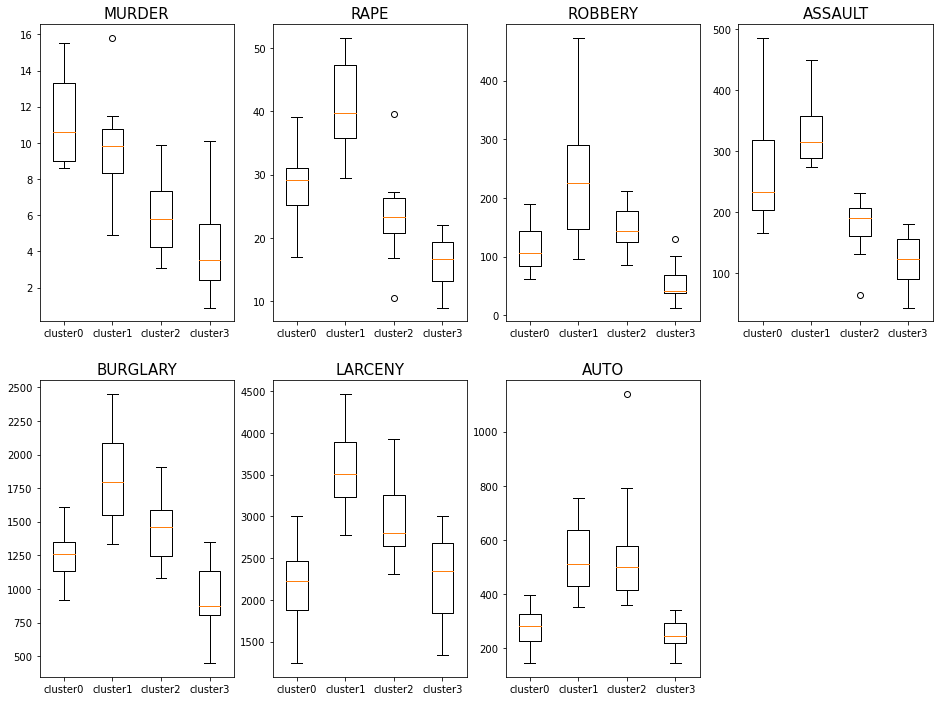

In [81]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)


ax1.boxplot([cluster0.MURDER, cluster1.MURDER, cluster2.MURDER, cluster3.MURDER], labels=['cluster0','cluster1','cluster2', 'cluster3']) # MURDER
ax1.set_title('MURDER', size=15)
ax2.boxplot([cluster0.RAPE, cluster1.RAPE, cluster2.RAPE, cluster3.RAPE], labels=['cluster0','cluster1','cluster2', 'cluster3']) # RAPE
ax2.set_title('RAPE', size=15)
ax3.boxplot([cluster0.ROBBERY, cluster1.ROBBERY, cluster2.ROBBERY, cluster3.ROBBERY], labels=['cluster0','cluster1','cluster2', 'cluster3']) # ROBBERY
ax3.set_title('ROBBERY', size=15)
ax4.boxplot([cluster0.ASSAULT, cluster1.ASSAULT, cluster2.ASSAULT, cluster3.ASSAULT], labels=['cluster0','cluster1','cluster2', 'cluster3']) # ASSAULT
ax4.set_title('ASSAULT', size=15)
ax5.boxplot([cluster0.BURGLARY, cluster1.BURGLARY, cluster2.BURGLARY, cluster3.BURGLARY], labels=['cluster0','cluster1','cluster2', 'cluster3'])# BURGLARY
ax5.set_title('BURGLARY', size=15)
ax6.boxplot([cluster0.LARCENY, cluster1.LARCENY, cluster2.LARCENY, cluster3.LARCENY], labels=['cluster0','cluster1','cluster2', 'cluster3'])# LARCENY
ax6.set_title('LARCENY', size=15)
ax7.boxplot([cluster0.AUTO, cluster1.AUTO, cluster2.AUTO, cluster3.AUTO], labels=['cluster0','cluster1','cluster2', 'cluster3'])# AUTO 비교
ax7.set_title('AUTO', size=15)

In [77]:
# MURDER가 높은 집단 => Cluster0
cluster0.STATEN

16          Virginia
23       Mississippi
26          Arkansas
27         Tennessee
28          Oklahoma
29             Texas
33          Missouri
34           Georgia
36           Alabama
41    North Carolina
43         Louisiana
44        New Mexico
49    South Carolina
Name: STATEN, dtype: object

In [78]:
# RAPE, ROBBERY, ASSAULT, BURGLARY, LARCENY가 높은 집단(위험 도시) => Cluster1
cluster1.STATEN

35      Michigan
37        Alaska
38        Oregon
39      Colorado
40       Arizona
42      New York
45        Nevada
46    California
47      Maryland
48       Florida
Name: STATEN, dtype: object

In [79]:
# 안전 도시 => Cluster3
cluster3.STATEN

0      North Dakota
1         Wisconsin
3     New Hampshire
4         Minnesota
5              Iowa
6     West Virginia
7           Vermont
8          Nebraska
9          Kentucky
10     Pennsylvania
12             Utah
14     South Dakota
15          Montana
17            Maine
18            Idaho
19          Wyoming
20           Kansas
Name: STATEN, dtype: object